In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [283]:
data.shape

(30697, 28)

In [284]:
data.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [285]:
data.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [286]:
data["is_goal"].isnull().sum()

6268

In [287]:
# cnt=0
# for i in range(data.shape[0]):
#     if pd.isnull(data.is_goal[i]) is True:
#         cnt+=1
        
 # print(cnt)

In [288]:
submit.shape

(5000, 2)

# Train data preprocessing

In [289]:
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [290]:
data.pop('Unnamed: 0')
print(1)

1


In [291]:
data.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [292]:
data.pop('match_id')
print(1)

1


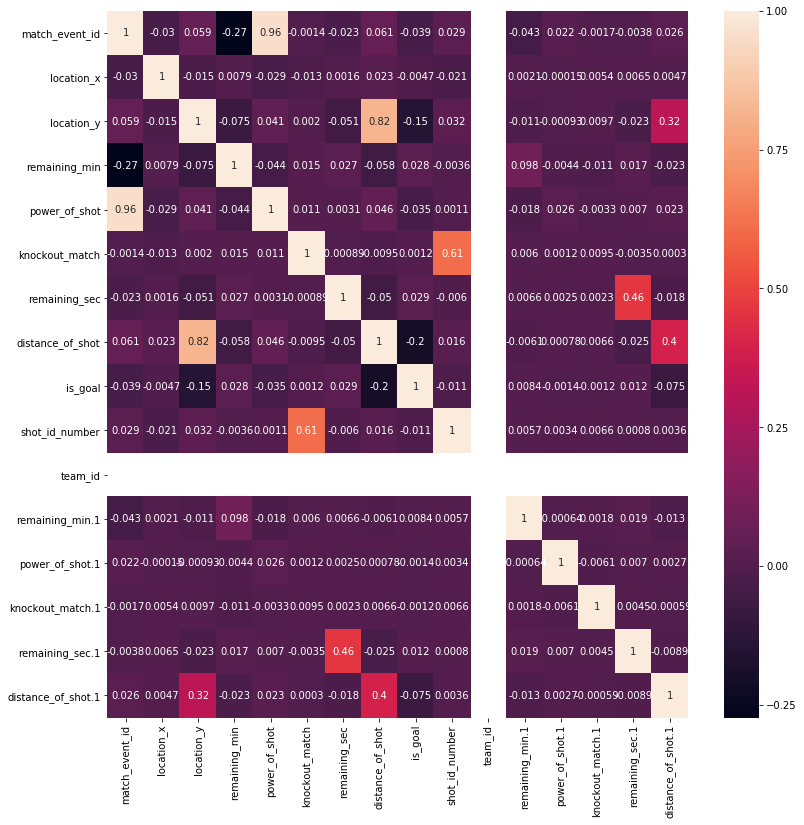

In [293]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), annot = True)

In [294]:
data = data.drop(['match_event_id'],axis = 1)

In [295]:
data.pop("team_id")
print(1)

1


In [296]:
data.pop("team_name")
print(1)

1


In [297]:
data.shape

(30697, 23)

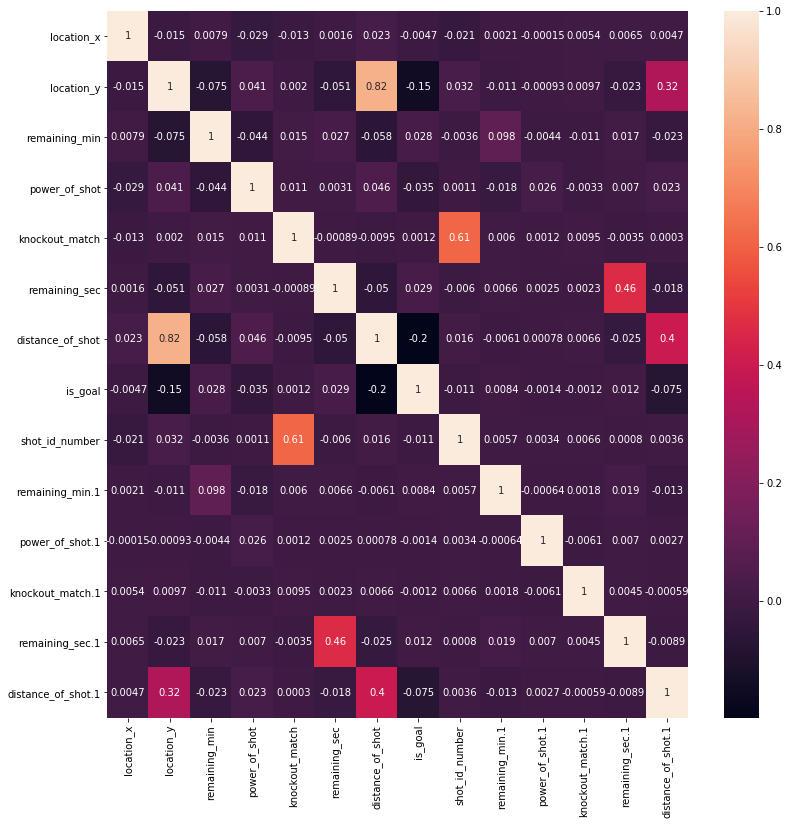

In [298]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), annot = True)

In [299]:
data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'date_of_game', 'home/away', 'shot_id_number', 'lat/lng',
       'type_of_shot', 'type_of_combined_shot', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [300]:
data.isnull().sum()

location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [301]:
data.location_x = data.location_x.fillna(np.mean(data.location_x))
data.location_y = data.location_x.fillna(np.mean(data.location_y))
data.remaining_min = data.remaining_min.fillna(np.mean(data.remaining_min))
data.power_of_shot = data.power_of_shot.fillna(data.power_of_shot.mode()[0])

In [302]:
data.knockout_match = data.knockout_match.fillna(data.knockout_match.mode()[0])
data.game_season = data.game_season.fillna(data.game_season.mode()[0])

In [303]:
data.game_season.unique()

array(['2000-01', '2005-06', '2001-02', '2002-03', '2003-04', '2004-05',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

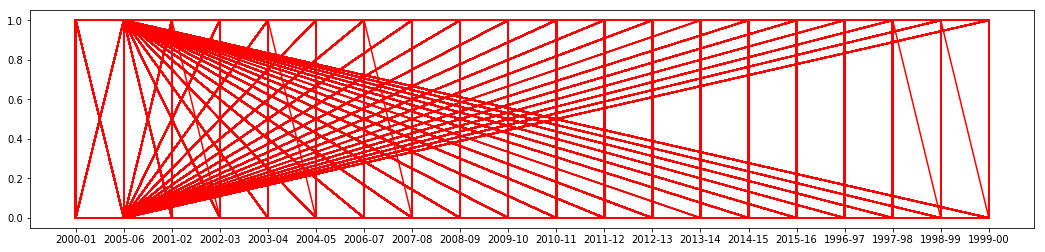

In [304]:
plt.figure(figsize=(18,4))
plt.plot(data.game_season, data.is_goal, 'r');

In [305]:
data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'date_of_game', 'home/away', 'shot_id_number', 'lat/lng',
       'type_of_shot', 'type_of_combined_shot', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [306]:
data.remaining_sec =  data.remaining_sec.fillna(np.mean(data.remaining_sec)) 
data.distance_of_shot =  data.distance_of_shot.fillna(np.mean(data.distance_of_shot)) 

In [307]:
data.isnull().sum()

location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot             0
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [308]:
data.area_of_shot = data.area_of_shot.fillna(data.area_of_shot.mode()[0])
data.shot_basics = data.shot_basics.fillna(data.shot_basics.mode()[0])

In [309]:
data.range_of_shot = data.range_of_shot.fillna(data.range_of_shot.mode()[0])
data.date_of_game = data.date_of_game.fillna(data.date_of_game.mode()[0])
data["lat/lng"] = data["lat/lng"].fillna(data["lat/lng"].mode()[0])
data["home/away"] = data["home/away"].fillna(data["home/away"].mode()[0])
data.type_of_shot = data.type_of_shot.fillna("0")
data.type_of_combined_shot = data.type_of_combined_shot.fillna("0")

# data.range_of_shot.value_counts()

In [310]:
# data.type_of_combined_shot[data.is_goal == 1.0].value_counts()  #shot-3

In [311]:
# data.type_of_combined_shot[data.is_goal == 0.0].value_counts()  #shot-3


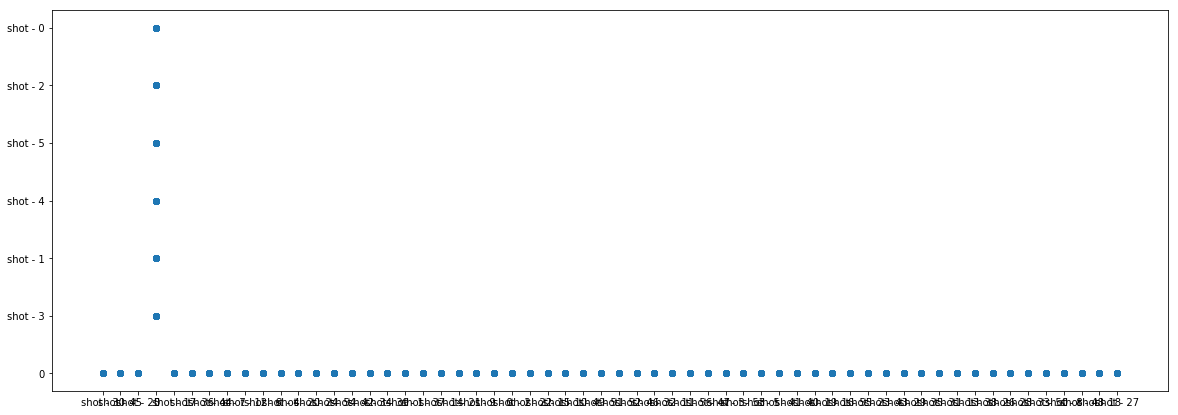

In [312]:
plt.figure(figsize = (20,7))
plt.scatter(data.type_of_shot, data.type_of_combined_shot)

In [313]:
data.isnull().sum()

location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
date_of_game                0
home/away                   0
shot_id_number           1563
lat/lng                     0
type_of_shot                0
type_of_combined_shot       0
remaining_min.1          1535
power_of_shot.1          1539
knockout_match.1         1493
remaining_sec.1          1539
distance_of_shot.1       1568
dtype: int64

In [314]:
data["remaining_min.1"] = data["remaining_min.1"].fillna(data["remaining_min.1"].mode()[0])
data["power_of_shot.1"] = data["power_of_shot.1"].fillna(data["power_of_shot.1"].mode()[0])
data["knockout_match.1"] = data["knockout_match.1"].fillna(data["knockout_match.1"].mode()[0])
data["remaining_sec.1"] = data["remaining_sec.1"].fillna(data["remaining_sec.1"].mode()[0])

In [315]:
data["distance_of_shot.1"] = data["distance_of_shot.1"].fillna(data["distance_of_shot.1"].mode()[0])

In [316]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot              object
shot_basics               object
range_of_shot             object
date_of_game              object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [317]:
data.pop("game_season")
print(1)

1


In [318]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.area_of_shot = le.fit_transform(data.area_of_shot)

In [319]:
data.pop('date_of_game')
print(1)

1


In [320]:
data.pop('lat/lng')
print(1)

1


In [321]:
data.shot_basics = le.fit_transform(data.shot_basics)
data.range_of_shot = le.fit_transform(data.range_of_shot)


In [322]:
data["home/away"] = le.fit_transform(data["home/away"])
data.type_of_shot = le.fit_transform(data.type_of_shot)
data.type_of_combined_shot = le.fit_transform(data.type_of_combined_shot)

In [323]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot               int32
shot_basics                int32
range_of_shot              int32
home/away                  int32
shot_id_number           float64
type_of_shot               int32
type_of_combined_shot      int32
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [336]:
x = data.drop(columns=['is_goal'])
y = data.is_goal

In [337]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [338]:
from sklearn.naive_bayes import GaussianNB

In [339]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [340]:
y_pred = gnb.predict(x_test)

In [341]:
y_pred

array([0., 1., 0., ..., 1., 1., 1.])

In [342]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.4045572383681266

In [343]:
1/(1+mae)

0.7119681367787061

# TEST RESULT

In [78]:
test.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0,35.0
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.0,0.000,12.0,32.0
17,17,138.0,-117.0,226.0,8.0,2.0,0.0,2000-01,50.0,45.0,...,"42.982923, -71.446094",shot - 6,NaN,20000019,1610612747,38.64,2.0,0.000,50.0,NaN
20,20,255.0,3.0,144.0,10.0,3.0,0.0,2000-01,8.0,34.0,...,"42.982923, -71.446094",shot - 20,NaN,20000019,1610612747,10.00,3.0,0.000,8.0,34.0
33,33,8.0,70.0,194.0,10.0,1.0,0.0,2000-01,58.0,40.0,...,"49.250068, -123.114646",NaN,shot - 3,20000047,1610612747,10.00,1.0,121.608,58.0,40.0


In [82]:
test.pop('Unnamed: 0')
test.pop('match_id')
test = test.drop(['date_of_game', 'lat/lng','match_event_id','game_season', 'shot_id_number', 'team_id', 'team_name'],axis = 1)

In [84]:
test.location_x = test.location_x.fillna(np.mean(test.location_x))
test.location_y = test.location_x.fillna(np.mean(test.location_y))
test.remaining_min = test.remaining_min.fillna(np.mean(test.remaining_min))
test.power_of_shot = test.power_of_shot.fillna(test.power_of_shot.mode()[0])
test.knockout_match = test.knockout_match.fillna(test.knockout_match.mode()[0])
# test.game_season = test.game_season.fillna(test.game_season.mode()[0])
test.area_of_shot = test.area_of_shot.fillna(test.area_of_shot.mode()[0])
test.shot_basics = test.shot_basics.fillna(test.shot_basics.mode()[0])
test.range_of_shot = test.range_of_shot.fillna(test.range_of_shot.mode()[0])
# test.date_of_game = data.date_of_game.fillna(data.date_of_game.mode()[0])
# test["lat/lng"] = data["lat/lng"].fillna(data["lat/lng"].mode()[0])
test["home/away"] = test["home/away"].fillna(test["home/away"].mode()[0])
test.type_of_shot = test.type_of_shot.fillna("0")
test.type_of_combined_shot = test.type_of_combined_shot.fillna("0")

In [88]:
test["remaining_min.1"] = test["remaining_min.1"].fillna(test["remaining_min.1"].mode()[0])
test["power_of_shot.1"] = test["power_of_shot.1"].fillna(test["power_of_shot.1"].mode()[0])
test["knockout_match.1"] = test["knockout_match.1"].fillna(test["knockout_match.1"].mode()[0])
test["remaining_sec.1"] = test["remaining_sec.1"].fillna(test["remaining_sec.1"].mode()[0])
test["distance_of_shot.1"] = test["distance_of_shot.1"].fillna(test["distance_of_shot.1"].mode()[0])


In [92]:
test.remaining_sec =  test.remaining_sec.fillna(np.mean(test.remaining_sec)) 
test.distance_of_shot =  test.distance_of_shot.fillna(np.mean(test.distance_of_shot)) 

In [93]:
test.isnull().sum()

location_x                 0
location_y                 0
remaining_min              0
power_of_shot              0
knockout_match             0
remaining_sec              0
distance_of_shot           0
is_goal                  998
area_of_shot               0
shot_basics                0
range_of_shot              0
home/away                  0
type_of_shot               0
type_of_combined_shot      0
remaining_min.1            0
power_of_shot.1            0
knockout_match.1           0
remaining_sec.1            0
distance_of_shot.1         0
dtype: int64

In [111]:
test.pop('is_goal')
print(1)

1


In [107]:
test.area_of_shot = le.fit_transform(test.area_of_shot)

In [105]:

test.shot_basics = le.fit_transform(test.shot_basics)
test.range_of_shot = le.fit_transform(test.range_of_shot)
test["home/away"] = le.fit_transform(test["home/away"])
test.type_of_shot = le.fit_transform(test.type_of_shot)
test.type_of_combined_shot = le.fit_transform(test.type_of_combined_shot)


In [112]:
test.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
area_of_shot               int32
shot_basics                int32
range_of_shot              int32
home/away                  int32
type_of_shot               int32
type_of_combined_shot      int32
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [115]:
res = gnb.predict(test)

In [116]:
len(res)

5000

In [118]:
submit.columns

Index(['shot_id_number', 'is_goal'], dtype='object')

In [124]:
# submit['is_goal'] = res

In [128]:
# submit.to_csv("answer1.csv",index=False)

# LGBM

In [157]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
        n_estimators=200,
        num_leaves=20,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=13,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )

In [158]:
clf.fit(x_train ,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.1, max_depth=13,
               min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.01, n_estimators=200, n_jobs=-1, num_leaves=20,
               objective=None, random_state=None, reg_alpha=0.1, reg_lambda=0.1,
               silent=True, subsample=0.8, subsample_for_bin=200000,
               subsample_freq=0)

In [159]:
y_pred = clf.predict(x_test)

In [160]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.3804066039023059

In [161]:
1/(1+mae)

0.7244242364337253

# ADABOOST

In [173]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0)

ImportError: cannot import name 'XGBClassifier'

In [170]:
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

In [171]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(1/(1+mae))

0.3839541547277937
0.722567287784679


In [179]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=300, max_depth=18, random_state=0)

In [180]:
rcf.fit(x_train, y_train)
y_pred = rcf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(1/(1+mae))

0.39104925637876925
0.7188818048062776


# Make test_set, taining_Set using given dataset

In [270]:
data["shot_id_number"].isnull().sum()

1563

In [324]:
for i in range(data.shape[0]):
    if pd.isnull(data["shot_id_number"][i]) == True:
        data["shot_id_number"][i] = i+1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:
arr=[]
for i in range(submit.shape[0]):
    if submit["shot_id_number"][i]:
        arr.append(data.iloc[submit["shot_id_number"][i]])
#         print(data.iloc[i])

In [326]:
submit.columns

Index(['shot_id_number', 'is_goal'], dtype='object')

In [327]:
len(arr)

5000

In [328]:
test = pd.DataFrame(arr)


In [329]:
#TEST SET
#------------------
test.to_csv("test1.csv", index=False)

In [330]:
test.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,-157.0,-157.0,10.0,1.0,0.0,22.0,35.0,0.0,2.0,4.0,2.0,28.0,2.0,41.0,0.0,10.00,1.0,28.800,22.0,35.0
8,-65.0,-65.0,6.0,3.0,0.0,12.0,32.0,1.0,2.0,1.0,2.0,28.0,9.0,31.0,0.0,6.00,3.0,0.000,12.0,32.0
17,-117.0,-117.0,8.0,2.0,0.0,50.0,45.0,1.0,1.0,4.0,4.0,71.0,18.0,54.0,0.0,38.64,2.0,0.000,50.0,20.0
20,3.0,3.0,10.0,3.0,0.0,8.0,34.0,0.0,0.0,4.0,2.0,71.0,21.0,14.0,0.0,10.00,3.0,0.000,8.0,34.0
33,70.0,70.0,10.0,1.0,0.0,58.0,40.0,NaN,4.0,4.0,0.0,35.0,34.0,0.0,4.0,10.00,1.0,121.608,58.0,40.0


In [331]:
#Train set
#----------

In [332]:
# for i in range(data.shape[0]):
#     if pd.isnull(data["is_goal"][i]) is True:

data = data.dropna(subset = ['is_goal'])        

In [333]:
data.is_goal.isnull().sum()

0

In [334]:
print(data.shape)
print(test.shape)
print(submit.shape)

(24429, 20)
(5000, 20)
(5000, 2)
